In [1]:
import pandas as pd

In [132]:
df=pd.read_csv('drug200.csv')

In [133]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [134]:
df.shape

(200, 6)

In [135]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [136]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [137]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
corr_matrix=df.corr

In [141]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [142]:
df['Sex'].value_counts()


Sex
M    104
F     96
Name: count, dtype: int64

In [143]:
df['BP'].value_counts()


BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [144]:

df['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [145]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

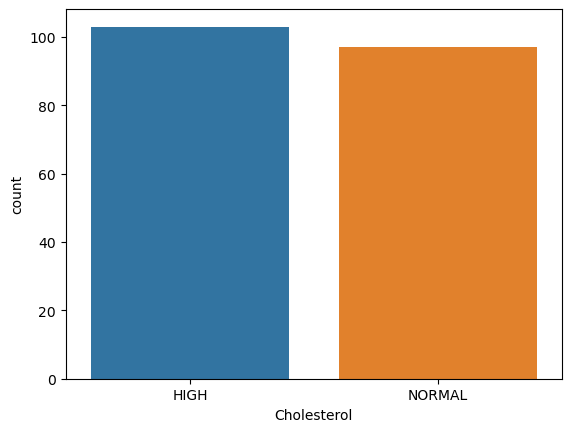

In [146]:
sns.countplot(x='Cholesterol', data=df)
plt.show()

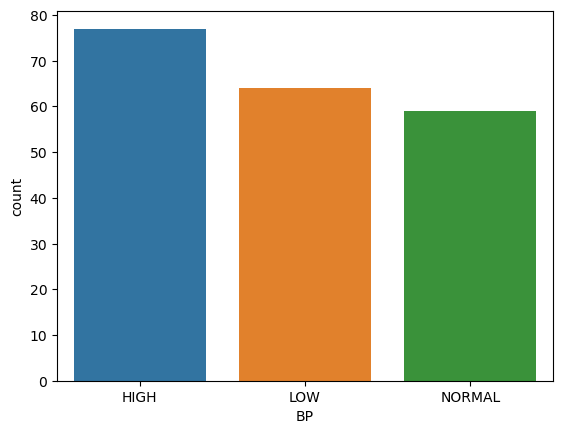

In [147]:
sns.countplot(x='BP', data=df)
plt.show()

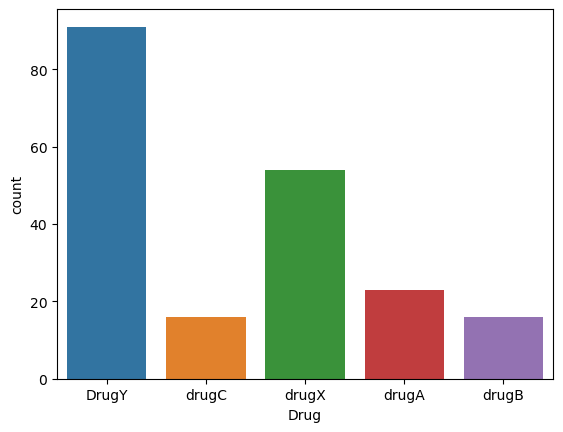

In [148]:
sns.countplot(x='Drug', data=df)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


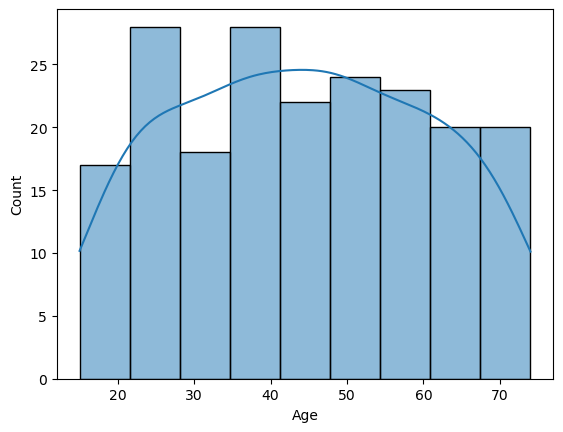

In [149]:
sns.histplot(df['Age'], kde=True)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


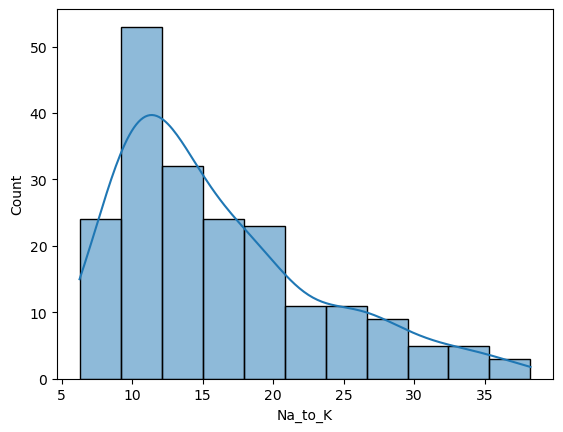

In [150]:
sns.histplot(df['Na_to_K'], kde=True)
plt.show()

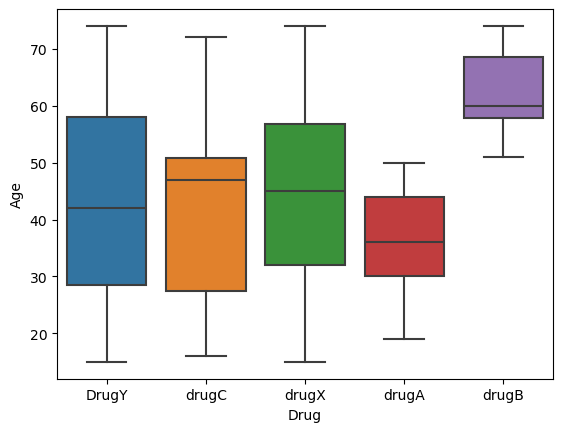

In [151]:
sns.boxplot(x='Drug', y='Age', data=df)
plt.show()

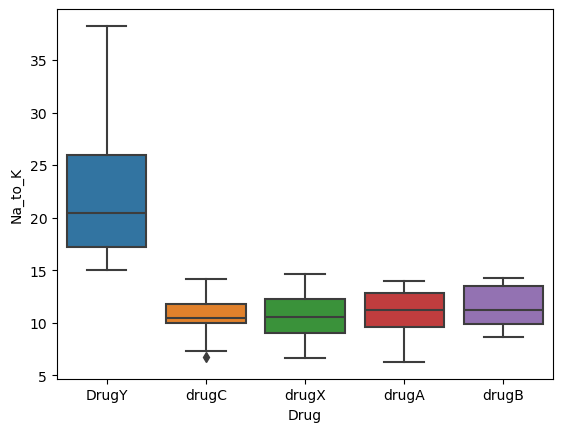

In [152]:
sns.boxplot(x='Drug', y='Na_to_K', data=df)
plt.show()

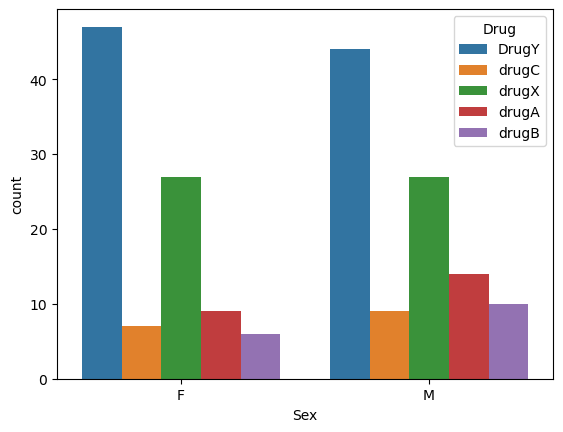

In [153]:
sns.countplot(x='Sex', hue='Drug', data=df)
plt.show()

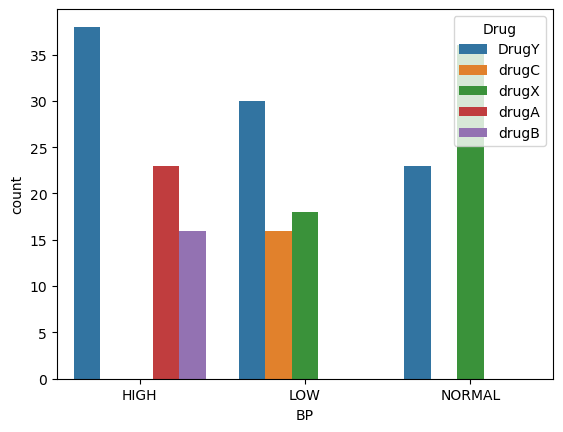

In [154]:
sns.countplot(x='BP', hue='Drug', data=df)
plt.show()

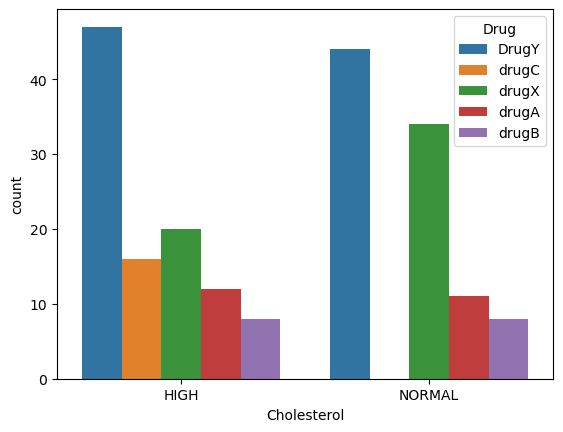

In [155]:
sns.countplot(x='Cholesterol', hue='Drug', data=df)
plt.show()

In [162]:
sex_map={"M":0,"F":1}
bp_map={"LOW":0,"NORMAL":1,"HIGH":2}
cholesterol_map={"NORMAL":0,"HIGH":1}
drug_map={"drugA":0,"drugB":1,"drugC":2
          ,"drugX":3,"DrugY":4}

In [163]:
df['Sex'] = df['Sex'].map(sex_map)
df['BP'] = df['BP'].map(bp_map)
df['Cholesterol'] = df['Cholesterol'].map(cholesterol_map)
df['Drug'] = df['Drug'].map(drug_map)

In [164]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,25.355,4
1,47,0,0,1,13.093,2
2,47,0,0,1,10.114,2
3,28,1,1,1,7.798,3
4,61,1,0,1,18.043,4
...,...,...,...,...,...,...
195,56,1,0,1,11.567,2
196,16,0,0,1,12.006,2
197,52,0,1,1,9.894,3
198,23,0,1,0,14.020,3


In [168]:
from sklearn.model_selection import train_test_split

x = df.drop('Drug', axis=1)
y = df['Drug']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [173]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(160, 5)
(40, 5)
(160,)
(40,)


In [174]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [175]:
model.fit(x_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [177]:
from sklearn.metrics import classification_report, confusion_matrix,precision_score
y_pred=model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  1  3  1]
 [ 0  0  0 10  1]
 [ 0  0  0  0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      0.20      0.33         5
           3       0.77      0.91      0.83        11
           4       0.88      1.00      0.94        15

    accuracy                           0.88        40
   macro avg       0.93      0.82      0.82        40
weighted avg       0.89      0.88      0.85        40



In [182]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [183]:
y_pred_rf=rf_model.predict(x_test)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [184]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(rf_model,f)